In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from matplotlib import cm

%matplotlib inline
params = {"ytick.color" : "c",
          "xtick.color" : "c",
          "axes.labelcolor" : "c",
          "axes.edgecolor" : "c",
         "text.color" : "c"}
plt.rcParams.update(params)#setup for dark theme

import pandas as pd
from sklearn.cluster import KMeans, MiniBatchKMeans, Birch, DBSCAN
from collections import Counter
from itertools import cycle
from sklearn import datasets, metrics
import scipy.stats as sstats

import seaborn as sns
import sklearn.model_selection as smselection#for data spliting
import tqdm

Zadanie 1. (1 punkt)<br>
a) Napisz własny klasyfikator K-Nearest Neighbours (KNN). Zadanie można wykonać w Matlabie,
Pythonie lub innym języku programowania. W zadaniu można użyć wcześniej zaimplementowanej
funkcji liczenia odległości (na przykład z zadania 0 z listy 3).<br>
b) Napisany klasyfikator KNN przetestuj na danych IRIS. Podziel dane losowo na dwie części: 100
wektorów danych użyj jako dane uczące do stworzenia klasyfikatora i 50 wektorów danych użyj
jako dane testowe do przetestowania stworzonego klasyfikatora. Powtórz ten eksperyment
kilkukrotnie i porównaj wyniki.<br>
c) Przeprowadź też podobny test klasyfikatora KNN na danych Optical Recognition of Handwritten
Digits (https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits).<br>
d) Zrób cross validation klasyfikatora KNN na obu zestawach danych: podziel dane na 10 części,
kolejno bierz jedną z nich, traktuj ją jako dane testowe, a pozostałe 9 części jako dane uczące,
stwórz klasyfikator na danych uczących i przetestuj na danych testowych, odnotuj liczbę błędów,
powtórz obliczenia dla kolejnych części danych, policz całkowity błąd klasyfikatora sumując
odnotowane liczby błędów.

A)

In [2]:
def KNN(train_X, train_Y, test_X, ks):
    """
    code from ML assignement
    Compute predictions for various k
    Args:
        train_X: array of shape Ntrain x D
        train_Y: array of shape Ntrain
        test_X: array of shape Ntest x D
        ks: list of integers, no of neighbours
    Returns:
        preds: dict k: predictions for k
    """
    # Cats data to float32
    train_X = train_X#.astype(np.float32)
    test_X = test_X#.astype(np.float32)
    # Alloc space for results
    preds = {}
    #dist matrix
    #X_train - former X, test_x - former Y
    dists = (np.sum(train_X ** 2, axis=1)[:,np.newaxis] - 2 * np.dot(train_X,test_X.T) +
                np.sum(test_X ** 2, axis=1))
    #findes closest trainig points
    #can be better, for small k 'for loop'
    closest = np.argsort(dists, axis=0) #sorting, returns indices
    targets = train_Y[closest]#
    for k in ks:
        predictions = sstats.mode(targets[:k])[0] #take k closest targets
        predictions = predictions.ravel()#flattened array
        preds[k] = predictions
    return preds#returns train examples targets

B)

In [3]:
# reading data
iris = datasets.load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],#data & number
                     columns= iris['feature_names'] + ['target'])#columns names
#using pandas data frame

In [4]:
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


In [5]:
print(iris.target)
print(iris.feature_names)
print(iris.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [6]:
# divide data
train, test = smselection.train_test_split(iris_df, train_size=0.666)

train_irisX = np.array(train[['sepal length (cm)', 'sepal width (cm)', 
                               'petal length (cm)', 'petal width (cm)']])
train_irisY = np.array(train['target'])

test_irisX = np.array(test[['sepal length (cm)', 'sepal width (cm)', 
                             'petal length (cm)', 'petal width (cm)']])
test_irisY = np.array(test['target'])


In [7]:
# run KNN, various k values
ks = np.arange(3,15)
predictions = KNN(train_irisX, train_irisY, test_irisX, ks)
print(predictions.items())#print dictionary items
k_max = 0.0
k_m=-1.0
for k, preds in predictions.items():
    result = list(preds == test_irisY)#counting True for correct target values
    k_val = result.count(True)/len(result)*100
    if k_val>k_max: 
        k_max = k_val
        k_m = k
    print(f'Poprawnosc dla k = {k}: {k_val}%')
print(f'max poprawnosc dla k = {k_m}: {k_max}')

dict_items([(3, array([0., 2., 2., 2., 2., 0., 2., 0., 1., 0., 0., 1., 0., 0., 0., 2., 1.,
       0., 2., 2., 0., 1., 1., 2., 0., 1., 0., 2., 0., 0., 1., 0., 2., 0.,
       2., 1., 0., 2., 1., 1., 2., 2., 1., 0., 0., 1., 2., 0., 2., 1., 0.])), (4, array([0., 2., 2., 2., 2., 0., 2., 0., 1., 0., 0., 1., 0., 0., 0., 2., 1.,
       0., 2., 2., 0., 1., 1., 2., 0., 1., 0., 2., 0., 0., 1., 0., 2., 0.,
       2., 1., 0., 2., 1., 1., 2., 2., 1., 0., 0., 1., 2., 0., 2., 1., 0.])), (5, array([0., 2., 2., 2., 2., 0., 2., 0., 1., 0., 0., 1., 0., 0., 0., 2., 1.,
       0., 2., 2., 0., 1., 2., 2., 0., 1., 0., 2., 0., 0., 1., 0., 2., 0.,
       2., 1., 0., 2., 1., 1., 2., 2., 1., 0., 0., 1., 2., 0., 2., 1., 0.])), (6, array([0., 2., 2., 2., 2., 0., 2., 0., 1., 0., 0., 1., 0., 0., 0., 2., 1.,
       0., 2., 2., 0., 1., 1., 2., 0., 1., 0., 2., 0., 0., 1., 0., 2., 0.,
       2., 1., 0., 2., 1., 1., 2., 2., 1., 0., 0., 1., 2., 0., 2., 1., 0.])), (7, array([0., 2., 2., 2., 2., 0., 2., 0., 1., 0., 0., 1., 0

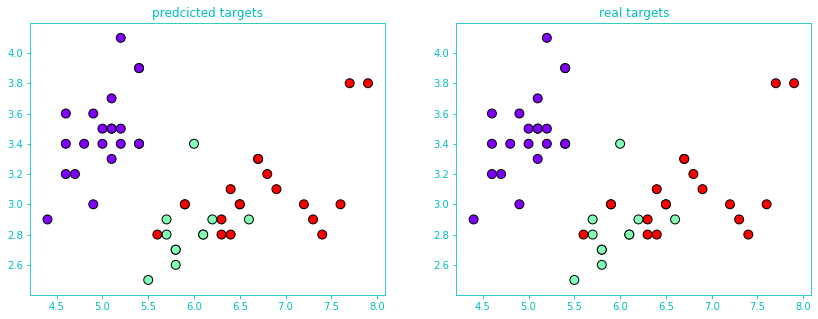

In [8]:
best_k = k_m
fig, axes = plt.subplots(1,2)
fig.set_size_inches(14,5)
#fig.suptitle('KNN on Iris')

axes[0].set_title('predcicted targets')
axes[1].set_title('real targets')

axes[0].scatter(test_irisX[:, 0], test_irisX[:, 1], s=80,
                c=predictions[best_k], edgecolors='black', cmap='rainbow')

axes[1].scatter(test_irisX[:, 0], test_irisX[:, 1], s=80,
                c=test_irisY, edgecolors='black', cmap='rainbow')

C)

In [22]:
# reading data
train_digits = np.array(pd.read_csv('optdigits.tra', header=None))
test_digits = np.array(pd.read_csv('optdigits.tes', header=None))
print(train_digits[0])
print(train_digits[0].size)
X_train = train_digits[:,:64]#last fo target
Y_train = train_digits[:,64]
X_test = test_digits[:,:64]
Y_test = test_digits[:, 64]

[ 0  1  6 15 12  1  0  0  0  7 16  6  6 10  0  0  0  8 16  2  0 11  2  0
  0  5 16  3  0  5  7  0  0  7 13  3  0  8  7  0  0  4 12  0  1 13  5  0
  0  0 14  9 15  9  0  0  0  0  6 14  7  1  0  0  0]
65


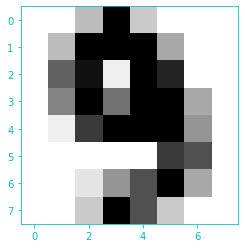

In [23]:
plt.imshow(X_train[1101].reshape(8, 8), cmap='Greys')


In [27]:

ks = np.arange(1,15)
predictions = KNN(X_train, Y_train, X_test, ks)

k_max = 0.0
k_m=-1.0
for k, preds in predictions.items():
    result = list(preds == Y_test)#counting True for correct target values
    k_val = result.count(True)/len(result)*100
    if k_val>k_max: 
        k_max = k_val
        k_m = k
    print(f'Poprawnosc dla k = {k}: {k_val}%')
print(f'max poprawnosc dla k = {k_m}: {k_max}')

Poprawnosc dla k = 1: 97.9966611018364%
Poprawnosc dla k = 2: 97.38452977184195%
Poprawnosc dla k = 3: 97.8297161936561%
Poprawnosc dla k = 4: 97.60712298274903%
Poprawnosc dla k = 5: 97.88536449638286%
Poprawnosc dla k = 6: 97.77406789092933%
Poprawnosc dla k = 7: 97.66277128547578%
Poprawnosc dla k = 8: 97.66277128547578%
Poprawnosc dla k = 9: 97.77406789092933%
Poprawnosc dla k = 10: 97.55147468002225%
Poprawnosc dla k = 11: 97.94101279910963%
Poprawnosc dla k = 12: 97.44017807456873%
Poprawnosc dla k = 13: 97.38452977184195%
Poprawnosc dla k = 14: 97.16193656093489%
max poprawnosc dla k = 1: 97.9966611018364


1797


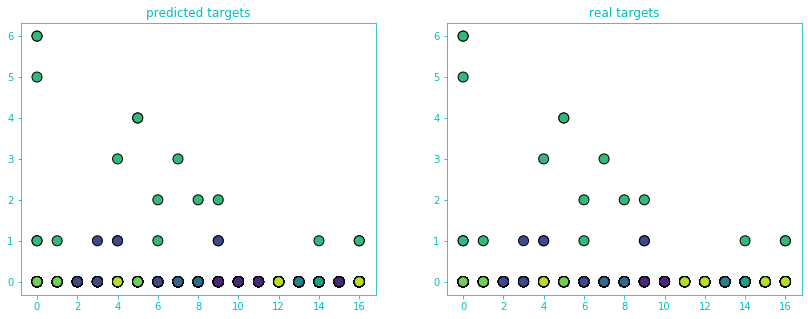

In [46]:

best_k = 1
fig, axes = plt.subplots(1,2)
fig.set_size_inches(14,5)
axes[0].set_title('predicted targets')
axes[1].set_title('real targets')

print(predictions[best_k].size)
axes[0].scatter(X_test[:, 45], X_test[:, 47], s=100,
                c=predictions[best_k], edgecolors='black')
#axes[0].scatter(X_test[0:100, 63], predictions[best_k][:100], s=100,
 #                edgecolors='black')


axes[1].scatter(X_test[:, 45], X_test[:, 47], s=100,
                c=Y_test, edgecolors='black')

In [57]:
for i in range(1700):
    if Y_test[i] != predictions[best_k][i]:
        print(i)
        #print(f'{Y_test[i]},   {predictions[best_k][i]}')

5
75
77
87
134
242
421
445
448
480
547
555
655
678
719
753
771
794
852
872
890
993
1038
1100
1118
1152
1363
1468
1552
1553
1605
1628
1658
1662


5,   9


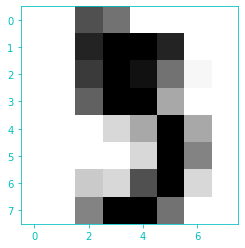

2,   1


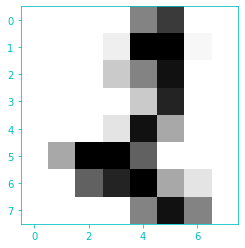

In [56]:
plt.imshow(X_test[5].reshape(8, 8), cmap='Greys')
print(f'{Y_test[5]},   {predictions[best_k][5]}')
plt.show()
plt.imshow(X_test[75].reshape(8, 8), cmap='Greys')
print(f'{Y_test[75]},   {predictions[best_k][75]}')
plt.show()

D)

In [67]:
def cross_validation(X, Y, no=10):
    error_sum = 0
    indices = np.random.uniform(0, no, len(X)).astype(int)
    for i in range(no):
        print(f'Test numer {i}')
        x_train = X[indices != i]#bierzemy te ktore potrzebujemy
        y_train = Y[indices != i]
        x_test = X[indices == i]
        y_test = Y[indices == i]
        
        ks = np.arange(1,15)
        predictions = KNN(x_train, y_train, x_test, ks)
        
        best_k, best_score = 0, 0
        for k, preds in predictions.items():
            result = list(preds == y_test)
            result_cnt = result.count(True) / len(result) * 100
            #analogicznie jak wczesniej
            if result_cnt > best_score:
                best_score = result_cnt
                best_k = k
        error_sum += best_score
        print(f'Najlepsze k: {best_k} wynik: {best_score}\n')
        
    print(f'bledy: {error_sum / no}')


In [68]:
cross_validation(train_irisX, train_irisY)


Test numer 0
Najlepsze k: 1 wynik: 100.0

Test numer 1
Najlepsze k: 1 wynik: 100.0

Test numer 2
Najlepsze k: 1 wynik: 85.71428571428571

Test numer 3
Najlepsze k: 3 wynik: 100.0

Test numer 4
Najlepsze k: 5 wynik: 100.0

Test numer 5
Najlepsze k: 1 wynik: 100.0

Test numer 6
Najlepsze k: 1 wynik: 100.0

Test numer 7
Najlepsze k: 1 wynik: 100.0

Test numer 8
Najlepsze k: 6 wynik: 100.0

Test numer 9
Najlepsze k: 1 wynik: 92.3076923076923

bledy: 97.80219780219781


In [69]:
#dane do cyferek
cross_validation(X_train, Y_train)


Test numer 0
Najlepsze k: 11 wynik: 99.2084432717678

Test numer 1
Najlepsze k: 3 wynik: 98.96103896103897

Test numer 2
Najlepsze k: 7 wynik: 98.94459102902374

Test numer 3
Najlepsze k: 1 wynik: 98.65591397849462

Test numer 4
Najlepsze k: 3 wynik: 99.74489795918367

Test numer 5
Najlepsze k: 1 wynik: 98.68766404199475

Test numer 6
Najlepsze k: 3 wynik: 98.99244332493703

Test numer 7
Najlepsze k: 1 wynik: 99.47780678851174

Test numer 8
Najlepsze k: 6 wynik: 98.92761394101876

Test numer 9
Najlepsze k: 3 wynik: 98.42931937172776

bledy: 99.00297326676989
